<a href="https://colab.research.google.com/github/AGoyal0512/Madison-Crime/blob/main/WordCloud_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/AGoyal0512/Madison-Crime.git

Cloning into 'Madison-Crime'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 86 (delta 40), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [3]:
data = pd.read_csv('Madison-Crime/cleaned_df.csv.zip', compression='zip')

In [4]:
data.columns

Index(['IncidentID', 'IncidentType', 'CaseNumber', 'Suspect', 'Arrested',
       'Address', 'Victim', 'Details', 'ReleasedBy', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

In [5]:
data.head()

,IncidentID,IncidentType,CaseNumber,Suspect,Arrested,Address,Victim,Details,ReleasedBy,Day,Month,Year,Hour
0,7400,Assist Outside Agency,2005-13680 ...,NaN,...,"700 Block of E. Washington Ave., Madison, Wisc...",...,On 2/6/05 at approximately 10:33 p.m. Officer ...,Mike Hanson,7,10,2005,4
1,7401,Arrested Person,2005-22647 ...,NaN,"Tony R Markovitch, 20 years old, 301 Knutson D...","First St & E Washington Ave, Madison, Wisconsin",n/a ...,"At approximately 11:42 pm, an officer noted a ...",Lt Pat Malloy,3,3,2005,6
2,7402,Arrested Person,2005-22345 ...,NaN,Martell D. Britton m/b 05-03-85\r\r\nCharge: ...,"8 New Berm Court, Madison, Wisconsin",Home Depot ...,"On 03/02/2005 at approximately 8:15 am, the Ma...",Lt. T. Peterson,2,3,2005,15
3,7403,Arrested Person,2005-22688 ...,NaN,"Twainesse L Peavy, 26 yrs old, 2317 Fish Hatch...","4300 Lumley Rd, Madison, Wisconsin",Adult male resident of Madison ...,"At approximately 7:30 am this date, Officers r...",Lt. Pat Malloy,3,3,2005,14
4,7404,Information,2005-999999 ...,NaN,...,"211 S. Carroll Street, Madison, Wisconsin",...,DELIVERY NOTICES FOR UNPAID PARKING TICKETS\r\...,Lieutenant Joe Balles,4,3,2005,20


**Stopwords:** 

A set of words that are not much of a concern to us. Words that belong to this category of “futile” words include those like *is, was, for, it, a, the,* etc. We use stopwords to filter out these words that aren't useful for our analysis.

In [6]:
stopwords = set(STOPWORDS)

I ran `full_details = ' '.join(data['Details'].str.lower())` to capture all the **Details** columns, but it's giving an error becaue `data['Details'][2355]` (and maybe many others) is a float value:

In [7]:
type(data['Details'][2355])

float

So I'm just converting all such instances into a string(`str`) to be able to generate a WordCloud easily:

In [8]:
for i in range(data.shape[0]):
    if type(data['Details'][i]) == float:
        data['Details'][i] = str(data['Details'][i])

In [9]:
full_details = ' '.join(data['Details'].str.lower())

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(full_details)

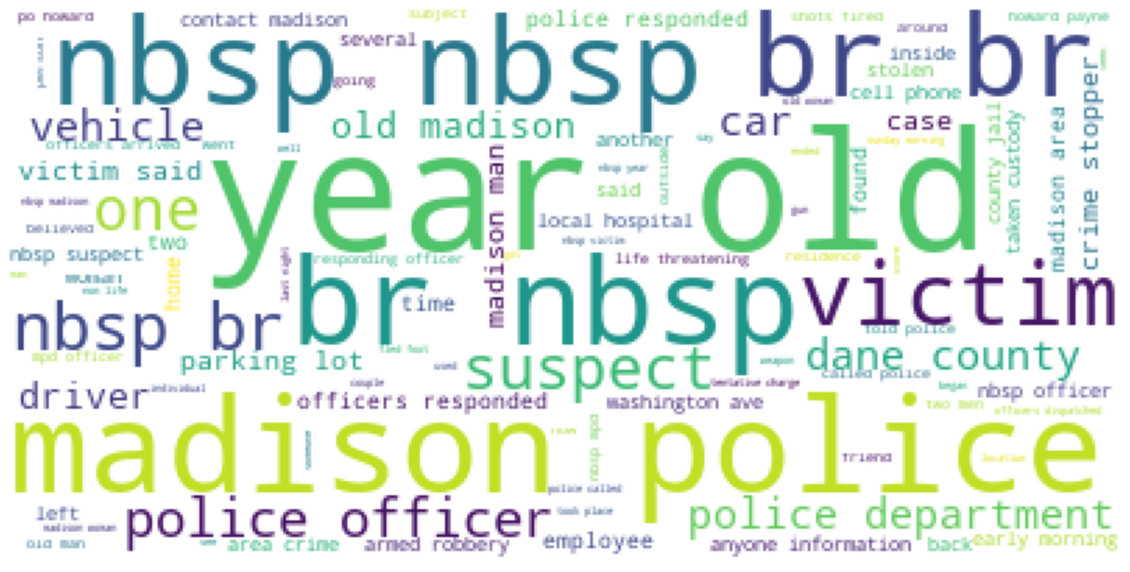

In [11]:
plt.rcParams['figure.figsize'] = 20, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

I see words like **suspect**, **victim**, **year**, **old** and **Madison**, which occur a lot of times, but might not be very helpful for our analysis since they're words that would naturally occur a lot in a word cloud being generated from a police dataset details column.

Trying to add them to stopwords and regenerate the wordcloud to see if that helps:

In [12]:
type(stopwords)

set

In [13]:
add_list = ['suspect', 'victim', 'year', 'old', 'madison']

for word in add_list:
    stopwords.add(word)

In [14]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(full_details)

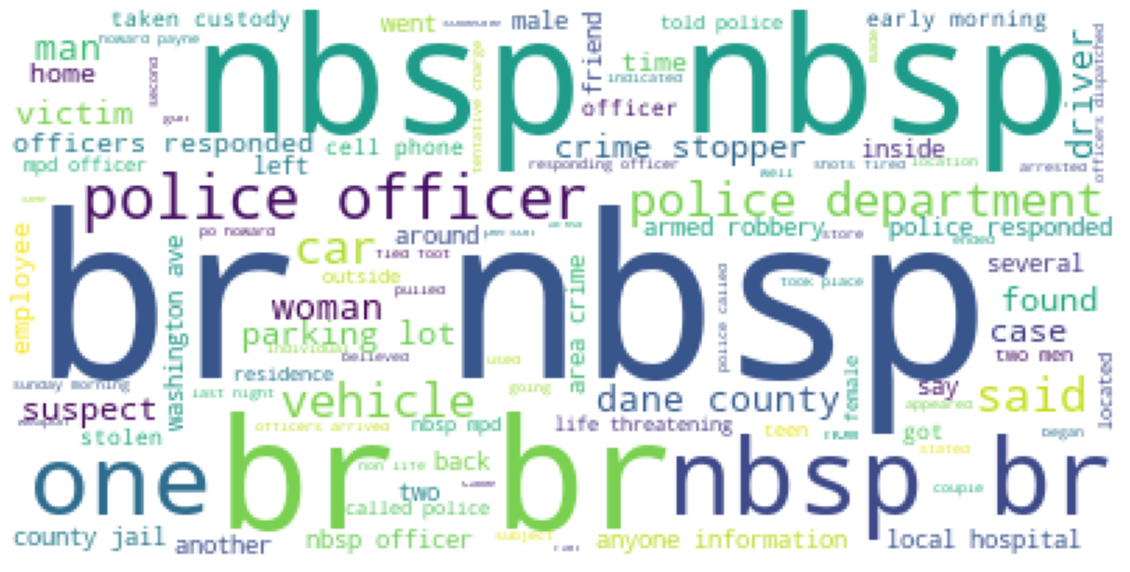

In [15]:
plt.rcParams['figure.figsize'] = 20, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Notice words like **nbsp** and **br** occurring repeatedly. They are the `No-Break Space` and `Break` elements, and we don't need them in the wordcloud either:

In [16]:
spec_list = ['nbsp', 'br']

for word in spec_list:
    stopwords.add(word)

In [17]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(full_details)

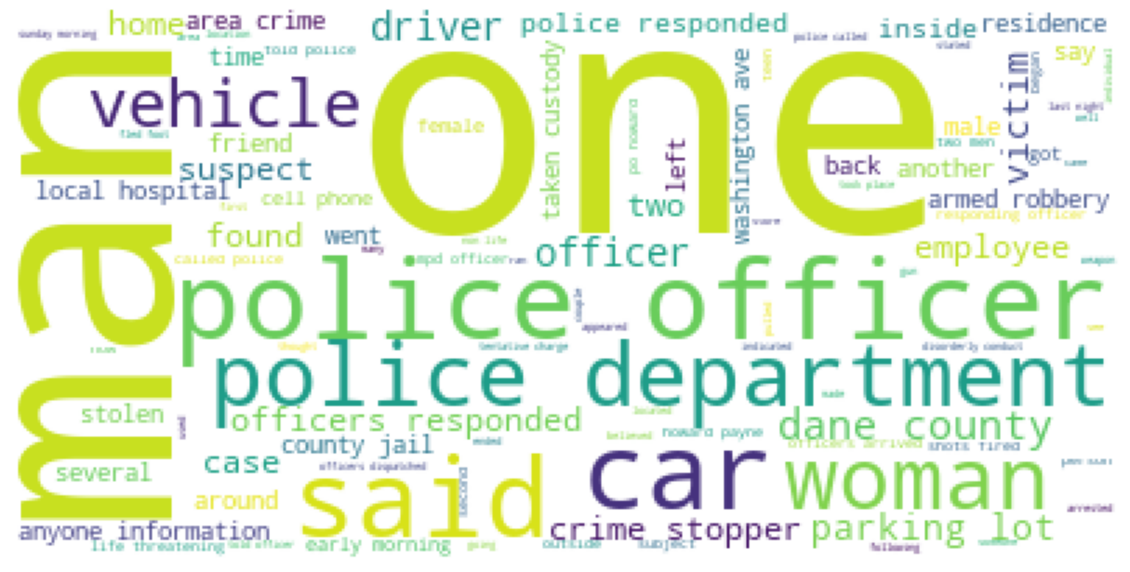

In [18]:
plt.rcParams['figure.figsize'] = 20, 40
plt.imshow(wordcloud)
plt.axis("off")
plt.show()